In [186]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
plt.style.use('seaborn')
pokemon = pd.read_csv('Datasets/pokemon.csv', sep=",")
from scipy.stats import chi2_contingency

In [187]:
penguins = sns.load_dataset("penguins")

In [188]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

# Assignment 9

In [189]:
penguins.corr()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
bill_length_mm           1.000000      -0.235053           0.656181   
bill_depth_mm           -0.235053       1.000000          -0.583851   
flipper_length_mm        0.656181      -0.583851           1.000000   
body_mass_g              0.595110      -0.471916           0.871202   

                   body_mass_g  
bill_length_mm        0.595110  
bill_depth_mm        -0.471916  
flipper_length_mm     0.871202  
body_mass_g           1.000000

Ik vind het logish body mass een sterke positieve correlatie heeft met flipper length. Grote penguins hebben grotere flippers en meer lichaamsgewicht. Ik vind het wel raar dat bill length een negatieve relatie met bill depth.

De sterkste positieve relatie is: body mass en flipper length.  
De sterkste negatieve relatie is: flipper length en bill depth.  
de zwakste correlatie is: bill depth met bill length.  

<AxesSubplot:xlabel='body_mass_g', ylabel='flipper_length_mm'>

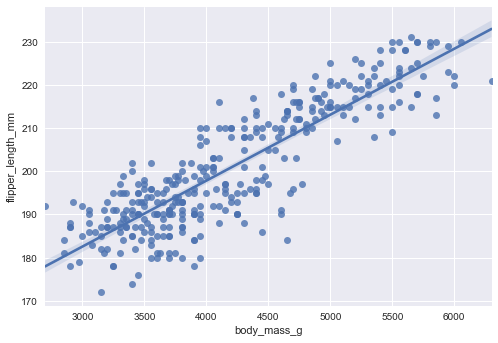

In [190]:
sns.regplot(x=penguins["body_mass_g"], y=penguins["flipper_length_mm"])

<AxesSubplot:xlabel='flipper_length_mm', ylabel='bill_depth_mm'>

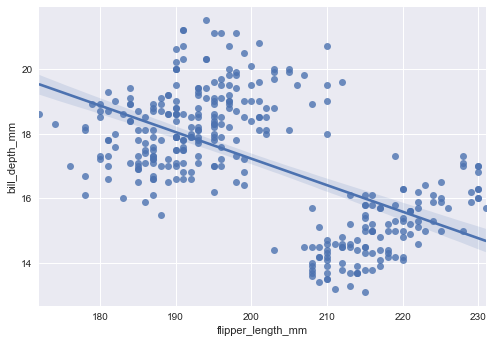

In [191]:
sns.regplot(x=penguins["flipper_length_mm"], y=penguins["bill_depth_mm"])

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

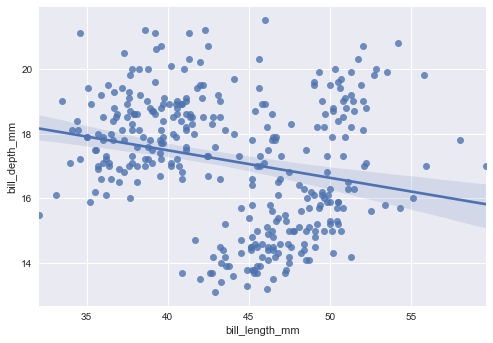

In [192]:
sns.regplot(x=penguins["bill_length_mm"], y=penguins["bill_depth_mm"])

# Assignment 10


## Pearson Correlation

In [193]:
pokemon.columns

Index(['NUMBER', 'CODE', 'SERIAL', 'NAME', 'TYPE1', 'TYPE2', 'COLOR',
       'ABILITY1', 'ABILITY2', 'ABILITY HIDDEN', 'GENERATION', 'LEGENDARY',
       'MEGA_EVOLUTION', 'HEIGHT', 'WEIGHT', 'HP', 'ATK', 'DEF', 'SP_ATK',
       'SP_DEF', 'SPD', 'TOTAL'],
      dtype='object')

In [194]:
pokemon[['DEF', 'SP_DEF']].corr()

DEF    SP_DEF
DEF     1.000000  0.527477
SP_DEF  0.527477  1.000000

## Scatterplot

<AxesSubplot:xlabel='DEF', ylabel='SP_DEF'>

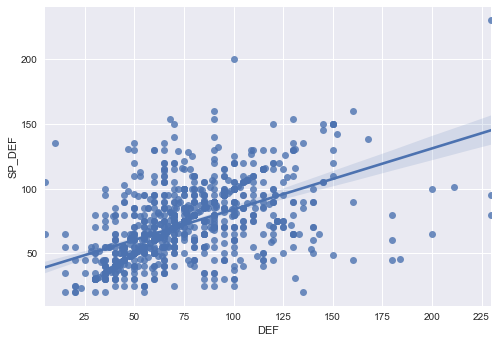

In [195]:
sns.regplot(x=pokemon["DEF"], y=pokemon["SP_DEF"])

Text(0.0, 1.0, 'smaller dots')

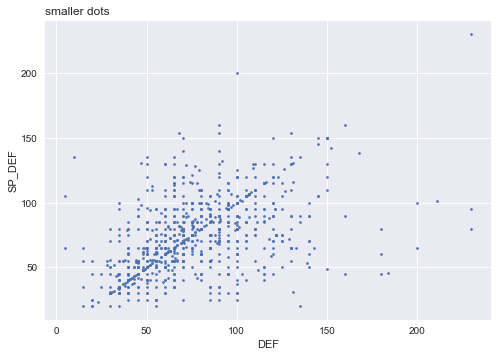

In [196]:
plt.plot( 'DEF', 'SP_DEF', data=pokemon, linestyle='', marker='o', markersize=2.7)
plt.xlabel('DEF')
plt.ylabel('SP_DEF')
plt.title('smaller dots', loc='left')

2e figuur geeft beter aan dat er hele sterke uitschieters zijn. Je ziet ook een hele sterke rechte lijn lopen van (30; 30) naar (100; 100). De hele rechte lijn geeft eigenlijk aan wat ik verwacht had, een hele sterke correlatie. Maar door de vele uitschieters verandert het daadwerkelijke correlatie cijfer. Ik had het correlatiecijfer daarom ook niet echt verwacht.

# Assignment 11

In [197]:
penguins.groupby("species").mean()

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
species                                                                 
Adelie          38.791391      18.346358         189.953642  3700.662252
Chinstrap       48.833824      18.420588         195.823529  3733.088235
Gentoo          47.504878      14.982114         217.186992  5076.016260

## Bill length

<AxesSubplot:xlabel='species', ylabel='bill_length_mm'>

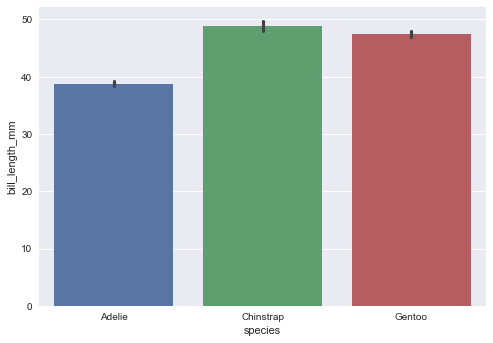

In [198]:
sns.barplot(y="bill_length_mm", x="species", data=penguins)

De Adelie groep heeft in vergelijking met de rest de korste snavels. De afwijking van een snavel binnen een groep verschilt niet heel erg.

# Bill Depth

<AxesSubplot:xlabel='species', ylabel='bill_depth_mm'>

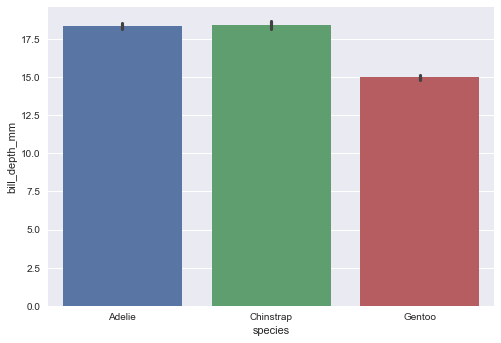

In [199]:
sns.barplot(y="bill_depth_mm", x="species", data=penguins)

De Gentoo groep heeft in vergelijking met de andere penguins de ondiepste snavel. De afwijking van de snavel binnen de groepen is klein. Dit vind ik logisch omdat dit ook het geval was voor de snavel lengte.

# Flipper length

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

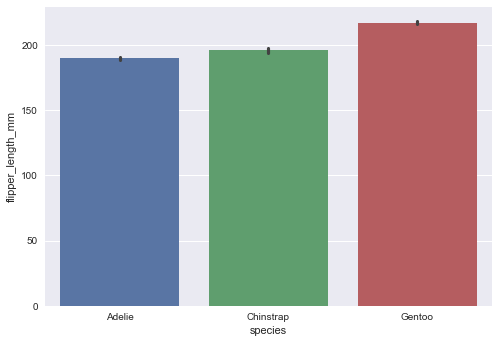

In [200]:
sns.barplot(y="flipper_length_mm", x="species", data=penguins)

De gentoo groep heeft de grootste flippers.

# Body Mass

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

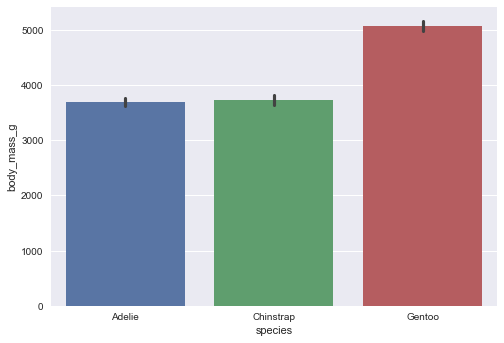

In [201]:
sns.barplot(y="body_mass_g", x="species", data=penguins)

Aan de hand van het resultaat over de lengte flippers. Had ik wel verwacht dat de Gentoo groep de meeste body mass bevat.  
Grotere flippers zijn nodig om een groter lichaam voort te bewegen is mijn gedachte

# Assignment 12


## Legendary


In [202]:
pokemon.groupby("LEGENDARY").mean()

NUMBER      CODE       SERIAL  GENERATION  MEGA_EVOLUTION  \
LEGENDARY                                                                  
0          419.614719  1.167749  4197.314935    4.137446        0.045455   
1          612.290323  1.338710  6124.241935    5.177419        0.064516   

             HEIGHT      WEIGHT         HP         ATK        DEF      SP_ATK  \
LEGENDARY                                                                       
0          1.098377   51.676082  66.622294   75.981602  71.260823   67.464286   
1          2.441129  215.481452  93.838710  112.056452  97.290323  111.451613   

              SP_DEF        SPD       TOTAL  
LEGENDARY                                    
0          68.389610  64.695887  414.414502  
1          97.935484  97.806452  610.379032

<AxesSubplot:xlabel='LEGENDARY', ylabel='TOTAL'>

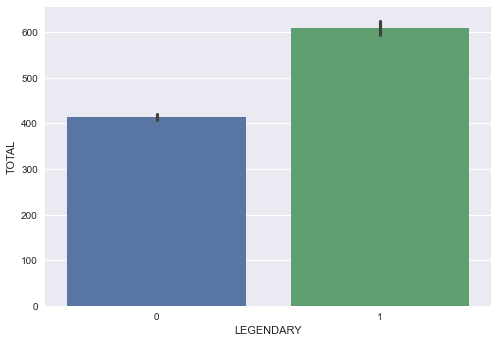

In [203]:
sns.barplot(y="TOTAL", x="LEGENDARY", data=pokemon)

<AxesSubplot:xlabel='LEGENDARY', ylabel='HEIGHT'>

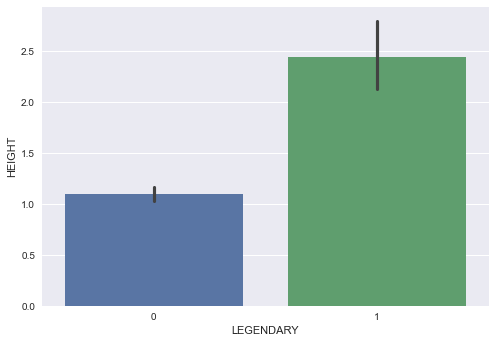

In [204]:
sns.barplot(y="HEIGHT", x="LEGENDARY", data=pokemon)

<AxesSubplot:xlabel='LEGENDARY', ylabel='WEIGHT'>

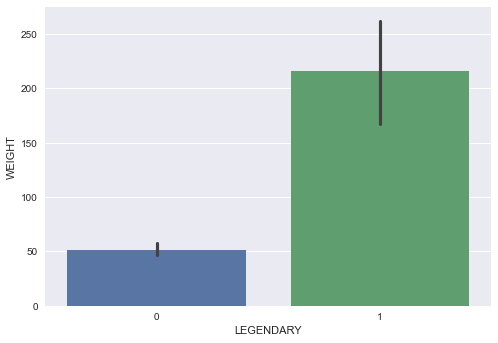

In [205]:
sns.barplot(y="WEIGHT", x="LEGENDARY", data=pokemon)

De verschillen tussen Legendary en non-legendary's zijn op alle vlakken hoog.  
De enige die meeval qua verschil met de mean is de "Height". Maar als we die in een barplot gooien zie dat er voor de legendary's wel heel veel speling in zit.  
Ook bij heigth zit er heel veel speling in bij de legendary's

## Type 1

In [206]:
pokemon.groupby("TYPE1").mean()

NUMBER      CODE       SERIAL  GENERATION  LEGENDARY  \
TYPE1                                                                
Bug       399.987952  1.120482  4001.000000    3.819277   0.036145   
Dark      483.600000  1.200000  4837.200000    5.155556   0.088889   
Dragon    549.219512  1.292683  5493.487805    4.609756   0.365854   
Electric  478.098361  1.344262  4782.327869    4.442623   0.131148   
Fairy     541.772727  1.045455  5418.772727    4.954545   0.136364   
Fighting  508.463415  1.121951  5085.756098    4.853659   0.146341   
Fire      401.923077  1.123077  4020.353846    3.984615   0.092308   
Flying    752.750000  1.125000  7528.625000    6.750000   0.250000   
Ghost     550.255814  1.465116  5504.023256    5.046512   0.069767   
Grass     438.456522  1.065217  4385.630435    4.282609   0.054348   
Ground    398.846154  1.128205  3989.589744    4.000000   0.102564   
Ice       462.289474  1.394737  4624.289474    4.947368   0.078947   
Normal    392.858333  1.141667  3929.725000    3.708333   0.050000   
Poison    331.384615  1.102564  3314.948718    3.871795   0.076923   
Psychic   467.949367  1.379747  4680.873418    4.544304   0.367089   
Rock      462.700000  1.183333  4628.183333    4.466667   0.100000   
Steel     520.222222  1.194444  5203.416667    4.777778   0.222222   
Water     378.279412  1.110294  3783.904412    3.566176   0.073529   

          MEGA_EVOLUTION    HEIGHT      WEIGHT         HP         ATK  \
TYPE1                                                                   
Bug             0.048193  0.867470   33.218072  56.614458   70.060241   
Dark            0.066667  1.166667   57.857778  69.622222   81.866667   
Dragon          0.146341  2.243902  127.109756  85.243902  107.024390   
Electric        0.032787  0.985246   38.480328  63.360656   74.426230   
Fairy           0.000000  0.927273   40.445455  72.954545   68.090909   
Fighting        0.048780  1.312195   78.904878  72.512195  102.390244   
Fire            0.061538  1.204615   64.866154  69.430769   85.400000   
Flying          0.000000  1.112500   41.225000  69.625000   75.125000   
Ghost           0.046512  1.213953   62.437209  64.302326   73.534884   
Grass           0.032609  1.063043   39.507609  66.771739   74.652174   
Ground          0.025641  1.397436  139.905128  70.717949   95.846154   
Ice             0.026316  1.213158  110.863158  72.473684   78.657895   
Normal          0.033333  1.031667   44.425000  76.800000   75.500000   
Poison          0.000000  1.266667   60.441026  69.846154   75.153846   
Psychic         0.063291  1.369620   78.148101  73.164557   76.012658   
Rock            0.050000  1.338333  114.481667  67.100000   91.783333   
Steel           0.111111  2.022222  231.113889  69.527778   94.083333   
Water           0.044118  1.430147   57.635294  71.220588   74.852941   

                 DEF     SP_ATK     SP_DEF        SPD       TOTAL  
TYPE1                                                              
Bug        71.156627  55.722892  64.590361  62.602410  380.746988  
Dark       66.644444  70.444444  67.111111  76.400000  432.088889  
Dragon     83.926829  91.731707  84.097561  84.341463  536.365854  
Electric   66.934426  89.967213  72.524590  85.147541  452.360656  
Fairy      70.545455  78.954545  89.181818  59.545455  439.272727  
Fighting   73.268293  56.658537  67.682927  70.634146  443.146341  
Fire       68.107692  86.415385  71.292308  74.369231  455.015385  
Flying     68.125000  73.875000  70.000000  87.000000  443.750000  
Ghost      80.069767  82.232558  78.488372  62.279070  440.906977  
Grass      71.804348  75.173913  70.141304  60.043478  418.586957  
Ground     85.512821  54.538462  63.410256  63.384615  433.410256  
Ice        72.736842  69.657895  73.447368  66.236842  433.210526  
Normal     60.583333  56.791667  64.091667  70.400000  404.166667  
Poison     72.205128  66.794872  67.230769  65.205128  416.435897  
Psychic    71.962025  98.632911  87.430380  80.379747  487.58227

<AxesSubplot:xlabel='TOTAL', ylabel='TYPE1'>

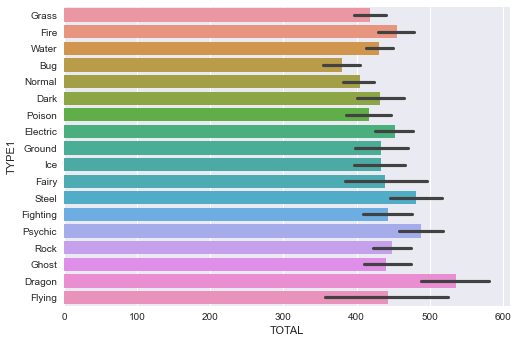

In [207]:
sns.barplot(x="TOTAL", y="TYPE1", data=pokemon)

[Text(0, 0, 'Grass'),
 Text(1, 0, 'Fire'),
 Text(2, 0, 'Water'),
 Text(3, 0, 'Bug'),
 Text(4, 0, 'Normal'),
 Text(5, 0, 'Dark'),
 Text(6, 0, 'Poison'),
 Text(7, 0, 'Electric'),
 Text(8, 0, 'Ground'),
 Text(9, 0, 'Ice'),
 Text(10, 0, 'Fairy'),
 Text(11, 0, 'Steel'),
 Text(12, 0, 'Fighting'),
 Text(13, 0, 'Psychic'),
 Text(14, 0, 'Rock'),
 Text(15, 0, 'Ghost'),
 Text(16, 0, 'Dragon'),
 Text(17, 0, 'Flying')]

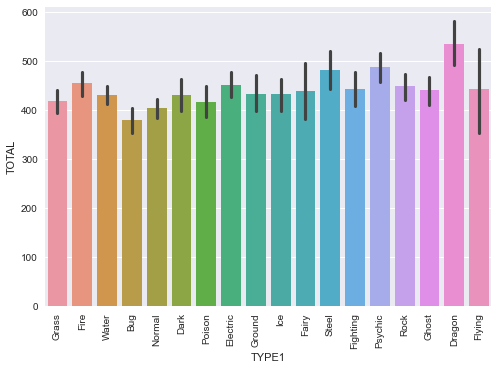

In [208]:
graph = sns.barplot(x="TYPE1", y="TOTAL", data=pokemon)
graph.set_xticklabels(graph.get_xticklabels(), rotation = 90)

De verschillen tussen de types zijn hoog. De hoogste confidence waarde van bug komt niet in de buurt van de laagste confidence waarde van dragon. De meeste variatie zit in Flying.

# Generation

In [209]:
pokemon.groupby("GENERATION").mean()

NUMBER      CODE       SERIAL  LEGENDARY  MEGA_EVOLUTION  \
GENERATION                                                                 
1            75.819277  1.108434   759.301205   0.042169        0.090361   
2           202.283019  1.056604  2023.886792   0.056604        0.056604   
3           322.503067  1.208589  3226.239264   0.110429        0.134969   
4           441.476190  1.246032  4416.007937   0.126984        0.039683   
5           574.523256  1.133721  5746.366279   0.116279        0.005814   
6           688.726190  1.226190  6888.488095   0.119048        0.011905   
7           656.016949  1.313559  6561.483051   0.262712        0.000000   
8           772.964602  1.256637  7730.902655   0.141593        0.000000   

              HEIGHT      WEIGHT         HP        ATK        DEF     SP_ATK  \
GENERATION                                                                     
1           1.278916   50.595181  65.819277  76.969880  70.861446  71.819277   
2           1.278302   58.528302  71.584906  72.028302  73.575472  66.132075   
3           1.417791   86.108589  66.914110  81.411043  74.331288  76.036810   
4           1.126984   74.372222  72.857143  81.555556  77.222222  75.706349   
5           1.080814   55.527326  71.831395  82.226744  71.970930  71.267442   
6           1.161905   59.669048  69.857143  76.380952  77.142857  74.333333   
7           1.466102  103.036441  69.601695  86.432203  78.288136  74.627119   
8           1.240708   86.175221  72.194690  83.061947  74.371681  70.654867   

               SP_DEF        SPD       TOTAL  
GENERATION                                    
1           69.150602  72.704819  427.325301  
2           74.094340  61.811321  419.226415  
3           71.386503  67.226994  437.306748  
4           76.603175  70.333333  454.277778  
5           68.354651  68.843023  434.494186  
6           75.250000  67.238095  440.202381  
7           73.567797  68.279661  450.796610  
8           70.407080  70.088496  440.778761

<AxesSubplot:xlabel='GENERATION', ylabel='WEIGHT'>

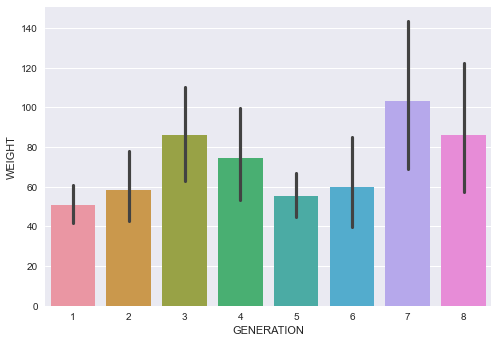

In [210]:
sns.barplot(x="GENERATION", y="WEIGHT", data=pokemon)

Blijkbaar zit er redelijk wat verschil tussen de weigth van een pokemon tussen de generations.  Ik zou eerlijk gezegd niet zo snel weten waarom.

# Assignment 13

## Species VS Sex

In [211]:
penguins.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

<AxesSubplot:>

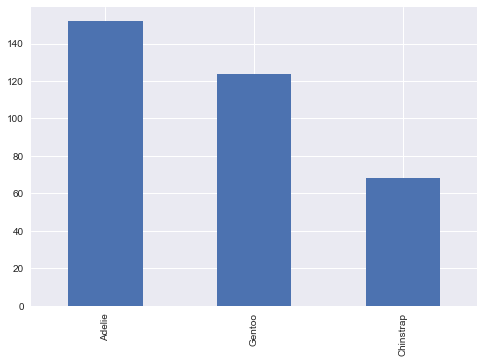

In [212]:
penguins.species.value_counts().plot(kind='bar')

<AxesSubplot:>

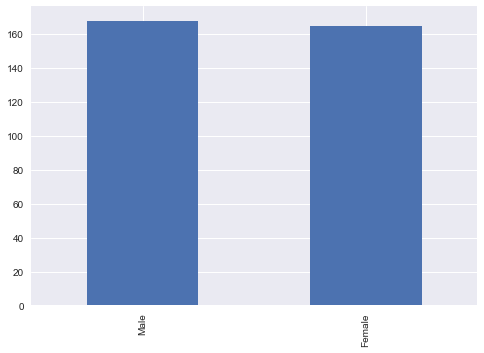

In [213]:
penguins.sex.value_counts().plot(kind='bar')

### Ik verwacht dat de kans dat een penguin male/female is niet afhangt van de soort.

In [214]:
contingencyTable = penguins.groupby(['species','sex']).size().unstack('sex', fill_value=0)
contingencyTable

sex        Female  Male
species                
Adelie         73    73
Chinstrap      34    34
Gentoo         58    61

<AxesSubplot:xlabel='species'>

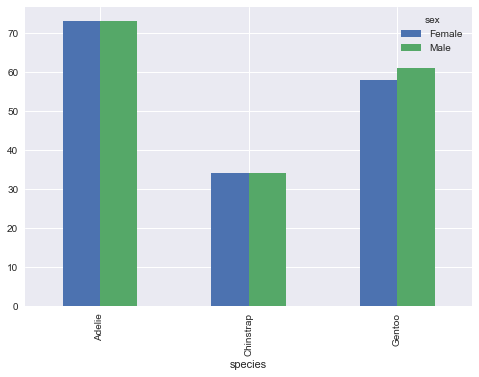

In [215]:
contingencyTable.plot(kind='bar')

### Zowel bij de contigency table als bij de bar plot zie je geen rare verschijnselen voorkomen. Bij elke species zijn de geslachten gelijk verdeeld.

In [216]:
chi2_contingency(contingencyTable)

(0.04860717014078318,
 0.9759893689765846,
 2,
 array([[72.34234234, 73.65765766],
        [33.69369369, 34.30630631],
        [58.96396396, 60.03603604]]))

### Het getal is hoog, wat betekent dat er weinig kans is dat het geslacht afhangt van de soort.

## Island VS Sex

### Ik verwacht dat elk eiland ongeveer een fifty/fifty male female ratio heeft.  
Misschien besluit een penguin wel zijn kansen te zoeken op een ander eiland als hij geen partner vindt op zijn originele eiland.

<AxesSubplot:>

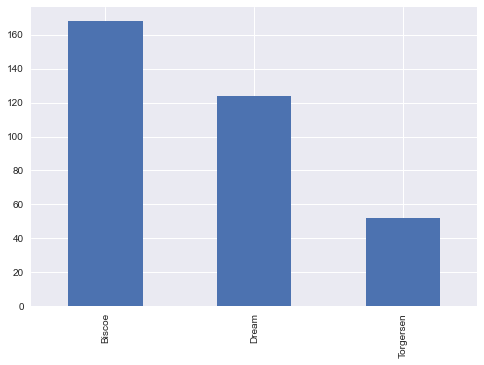

In [217]:
penguins.island.value_counts().plot(kind='bar')

In [218]:
contingencyTable = penguins.groupby(['island','sex']).size().unstack('sex', fill_value=0)
contingencyTable

sex        Female  Male
island                 
Biscoe         80    83
Dream          61    62
Torgersen      24    23

<AxesSubplot:xlabel='island'>

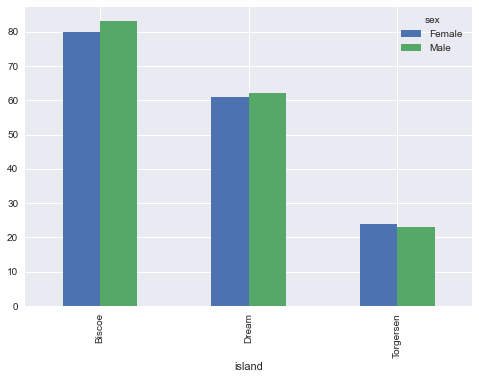

In [219]:
contingencyTable.plot(kind='bar')

### Uit de bar plot en contigency table komen geen rare getallen. Op elk eiland is de ratio male/female ongeveer 50/50

In [220]:
chi2_contingency(contingencyTable)

(0.05759904881286207,
 0.971611229281065,
 2,
 array([[80.76576577, 82.23423423],
        [60.94594595, 62.05405405],
        [23.28828829, 23.71171171]]))

### Het getal is hoog, dat betekent dat er weinig kans is dat er verschil zit tussen de verschillende eilanden voor male/female

# Assignment 14

In [221]:
pokemon.columns

Index(['NUMBER', 'CODE', 'SERIAL', 'NAME', 'TYPE1', 'TYPE2', 'COLOR',
       'ABILITY1', 'ABILITY2', 'ABILITY HIDDEN', 'GENERATION', 'LEGENDARY',
       'MEGA_EVOLUTION', 'HEIGHT', 'WEIGHT', 'HP', 'ATK', 'DEF', 'SP_ATK',
       'SP_DEF', 'SPD', 'TOTAL'],
      dtype='object')

## Legendary VS Type

### Mijn verwachting is dat er  verschillen zijn hoeveel legendary's elke type heeft vergeleken met non-legendaries.

Ik wil type1 en type2 gebruiken, kijken wat de beste manier is.

In [222]:
contingencyTable = pokemon.groupby(['LEGENDARY','TYPE1', 'TYPE2']).size().unstack('LEGENDARY', fill_value=0)
contingencyTable.head(20)

LEGENDARY        0  1
TYPE1 TYPE2          
Bug   Electric   4  0
      Fairy      2  0
      Fighting   2  2
      Fire       2  0
      Flying    14  0
      Ghost      1  0
      Grass      6  0
      Ground     2  0
      Poison    12  0
      Psychic    2  0
      Rock       3  0
      Steel      6  1
      Water      3  0
Dark  Dragon     3  1
      Fairy      3  0
      Fighting   2  0
      Fire       3  0
      Flying     4  1
      Ghost      2  0
      Grass      0  1

<AxesSubplot:xlabel='TYPE1,TYPE2'>

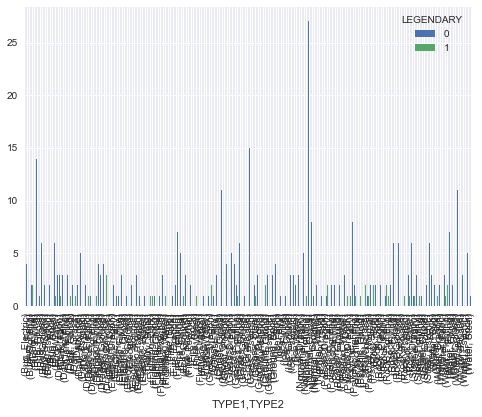

In [223]:
contingencyTable.plot(kind='bar')

Dit is geen goede oplossing

Voor de volgende oplossing, willen we type1 en type2 onder mekaar zetten, en nog steeds bepalen of het om een legendary gaat.

In [224]:
Type1 = pokemon[['LEGENDARY', 'TYPE1']]
Type2 = pokemon[['LEGENDARY', 'TYPE2']]

In [225]:
Type1.columns = ['LEGENDARY', 'Type']
Type2.columns = ['LEGENDARY', 'Type']

In [226]:
TypesLegendary = pd.concat([Type1, Type2], ignore_index=True)

In [227]:
TypesLegendary.columns

Index(['LEGENDARY', 'Type'], dtype='object')

In [228]:
contingencyTable = TypesLegendary.groupby(['LEGENDARY','Type']).size().unstack('LEGENDARY', fill_value=0)
contingencyTable.head(20)

LEGENDARY    0   1
Type              
Bug         89   3
Dark        64   7
Dragon      49  23
Electric    62   9
Fairy       53  10
Fighting    58  15
Fire        73   9
Flying     101  16
Ghost       59   9
Grass      118   8
Ground      74   7
Ice         50   7
Normal     125   6
Poison      73   4
Psychic     84  35
Rock        69   6
Steel       55  16
Water      144  12

Redelijk wat data in tabelvorm dus nog niet heel overzichtelijk. Wel kunnen we gelijk zijn dat de ratio legendary/non-legendary voor dragon 49/23 is. Voor Bug is dit maar 89/3. Zelf denk ik dus al dat er verschil in zit.

<AxesSubplot:xlabel='Type'>

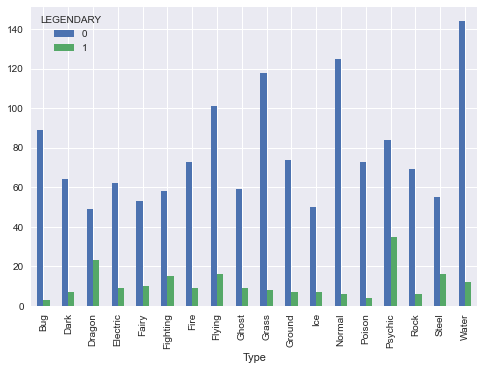

In [229]:
contingencyTable.plot(kind='bar')

We zien dat psychic de meeste legendary's heeft. Nu valt ook al op met het blote oog dat wanneer een type veel non-legendary's heeft, dit niet automatisch betekent dat het ook veel legendary's heeft.

In [230]:
chi2_contingency(contingencyTable)

(96.19327864168324,
 4.4907529467552847e-13,
 17,
 array([[ 80.39950062,  11.60049938],
        [ 62.0474407 ,   8.9525593 ],
        [ 62.92134831,   9.07865169],
        [ 62.0474407 ,   8.9525593 ],
        [ 55.05617978,   7.94382022],
        [ 63.79525593,   9.20474407],
        [ 71.66042447,  10.33957553],
        [102.24719101,  14.75280899],
        [ 59.42571785,   8.57428215],
        [110.11235955,  15.88764045],
        [ 70.78651685,  10.21348315],
        [ 49.81273408,   7.18726592],
        [114.48189763,  16.51810237],
        [ 67.29088639,   9.70911361],
        [103.99500624,  15.00499376],
        [ 65.54307116,   9.45692884],
        [ 62.0474407 ,   8.9525593 ],
        [136.32958801,  19.67041199]]))

Er komt een heel klein getal uit. Het is duidelijk te zien dat er een verschil is tussen legendary/non-legendary en de type die de pokemon heeft.

# Experimenteel

In [235]:
Bug1 = pokemon['TYPE1'] == 'Bug'
Bug2 = pokemon['TYPE2'] == 'Bug'
Kommo = pokemon['NAME'] == 'Kommo-o'
pokemon[Kommo].head()

NUMBER  CODE  SERIAL     NAME   TYPE1     TYPE2 COLOR     ABILITY1  \
922     784     1    7841  Kommo-o  Dragon  Fighting  Grey  Bulletproof   

       ABILITY2 ABILITY HIDDEN  ...  MEGA_EVOLUTION  HEIGHT  WEIGHT  HP  ATK  \
922  Soundproof       Overcoat  ...               0     1.6    78.2  75  110   

     DEF  SP_ATK  SP_DEF  SPD  TOTAL  
922  125     100     105   85    600  

[1 rows x 22 columns]

In [238]:
table_bug_1 = pokemon[Bug1]
table_bug_2 = pokemon[Bug2]

In [240]:
all_bugs = pd.concat([table_bug_1, table_bug_2])

In [244]:
legendary = all_bugs['LEGENDARY'] == 1

In [245]:
all_bugs[legendary]

NUMBER  CODE  SERIAL       NAME TYPE1     TYPE2   COLOR     ABILITY1  \
766     649     1    6491   Genesect   Bug     Steel  Purple     Download   
932     794     1    7941   Buzzwole   Bug  Fighting     Red  Beast Boost   
933     795     1    7951  Pheromosa   Bug  Fighting   White  Beast Boost   

    ABILITY2 ABILITY HIDDEN  ...  MEGA_EVOLUTION  HEIGHT  WEIGHT   HP  ATK  \
766      NaN            NaN  ...               0     1.5    82.5   71  120   
932      NaN            NaN  ...               0     2.4   333.6  107  139   
933      NaN            NaN  ...               0     1.8    25.0   71  137   

     DEF  SP_ATK  SP_DEF  SPD  TOTAL  
766   95     120      95   99    600  
932  139      53      53   79    570  
933   37     137      37  151    570  

[3 rows x 22 columns]